# Telecom churn 
## 1. Data preparation 

In [1]:
import pandas as pd, numpy as np
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
churn_data = pd.read_csv("churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer_data= pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [4]:
internet_data= pd.read_csv("internet_data.csv")
internet_data.head()


,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [5]:
#merging files 

df_1= pd.merge(churn_data, customer_data, how= 'inner', on= 'customerID')

In [6]:
telecom= pd.merge(df_1, internet_data, how= 'inner', on='customerID')
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [7]:
telecom.shape

(7043, 21)

In [8]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [9]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), obj

In [10]:
varlist = ['PaperlessBilling','Partner','PhoneService','Churn','Dependents']

def binary_map(x):
    return x.map({ 'Yes': 1, 'No': 0})
telecom[varlist]= telecom[varlist].apply(binary_map)

In [11]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [12]:
#For categorical variables

dummy1= pd.get_dummies(telecom[['Contract','PaymentMethod','gender','InternetService']],drop_first= True)
telecom= pd.concat([telecom,dummy1],axis=1)

In [13]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [14]:
# Creating dummy variables for the variable 
ml= pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1= ml.drop(['MultipleLines_No phone service'],1)
#Adding the results to the master dataframe
telecom= pd.concat([telecom,ml1], axis=1)

In [15]:
os= pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1= os.drop(['OnlineSecurity_No internet service'],1)
telecom= pd.concat([telecom,os1], axis=1)

In [16]:
ob= pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1= ob.drop(['OnlineBackup_No internet service'],1)
telecom= pd.concat([telecom,ob1], axis=1)

In [17]:
dp= pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1= dp.drop(['DeviceProtection_No internet service'],1)
telecom= pd.concat([telecom,dp1], axis=1)

In [18]:
ts= pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1= ts.drop(['TechSupport_No internet service'],1)
telecom= pd.concat([telecom,ts1], axis=1)

In [19]:
st= pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1= st.drop(['StreamingTV_No internet service'],1)
telecom= pd.concat([telecom,st1], axis=1)

In [20]:
sm= pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1= sm.drop(['StreamingMovies_No internet service'],1)
telecom= pd.concat([telecom,sm1], axis=1)

In [21]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


In [22]:
# created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [23]:
telecom['TotalCharges']=telecom['TotalCharges'].convert_objects(convert_numeric=True)

In [24]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7032 non-null float64
Churn                                    7043 non-null int64
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
Contract_One year                        7043 non-null uint8
Contract_Two year                        7043 non-null uint8
PaymentMethod_Credit card (automatic)    7043 non-null uint8
PaymentMethod_Electronic check           7043 non-null uint8
PaymentMethod_Mailed check        

In [25]:
#telecom['OnlineBackup'].astype("category").value_counts()

## checking for outliers

In [26]:
num_telecom= telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [27]:
num_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


As the numbers are gradually increasing there are no outliers

Check for missing values

In [28]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

It means that 11/7043 = 0.001561834 i.e 0.1% best is to remove these observations from the analysis.

In [29]:
telecom= telecom[~np.isnan(telecom['TotalCharges'])]

In [30]:
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

### Train test split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x= telecom.drop(['Churn','customerID'],axis=1)
x.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [33]:
y= telecom['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [34]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size= 0.7,test_size=0.3)

# Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler= StandardScaler()
x_train[['tenure','MonthlyCharges','TotalCharges']]= scaler.fit_transform(x_train[['tenure','MonthlyCharges','TotalCharges']])
x_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
1307,0.129501,1,1,0.365125,0.168006,0,0,0,1,0,...,0,1,0,1,0,1,1,0,0,1
5813,0.619217,1,0,1.567066,1.392457,0,1,1,0,1,...,0,1,0,1,0,1,0,1,0,1
1525,-1.053978,1,0,-1.455193,-0.949086,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1993,-1.298836,1,1,-0.624611,-0.999265,0,1,1,0,0,...,1,0,1,0,1,0,1,0,1,0
1554,-0.278595,1,0,-1.446904,-0.789866,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
total_churn = float(sum(telecom['Churn']))
l= len(telecom['Churn'])         
churn= (total_churn/l)*100
churn

26.578498293515356

Almost 27% of churn rate

# Looking at correlations 

In [38]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

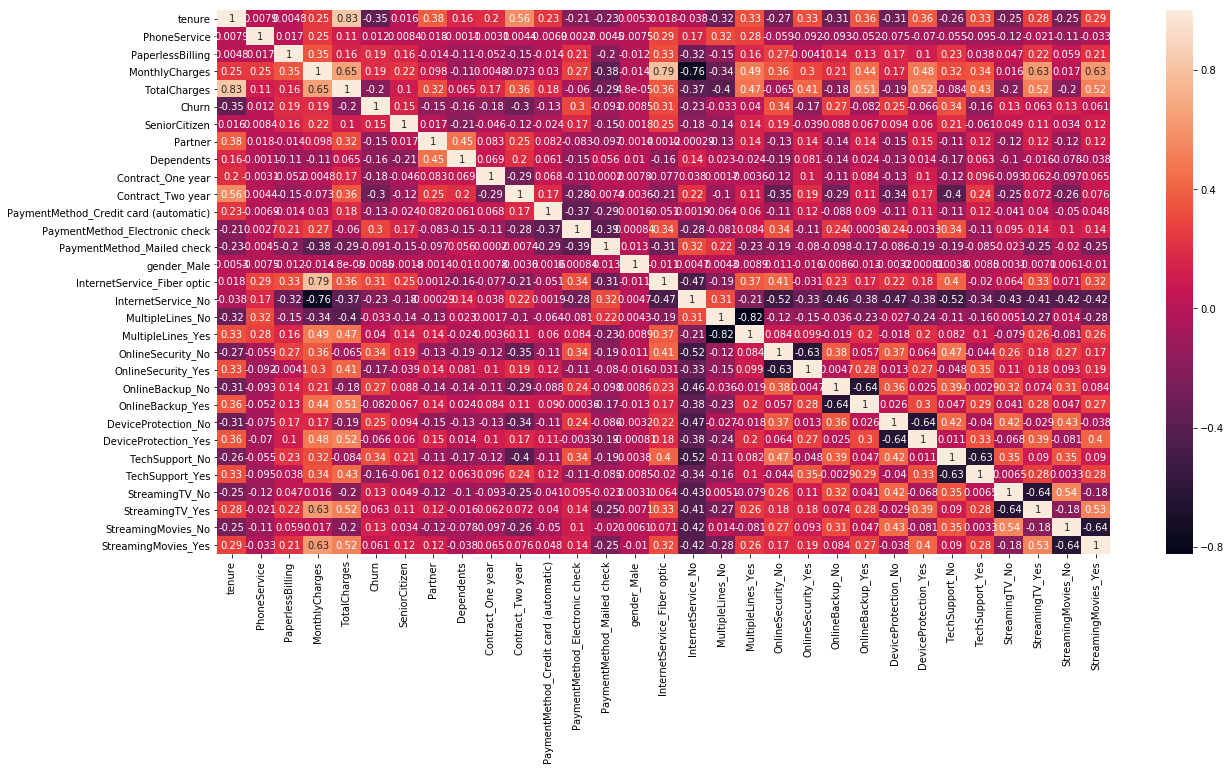

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(telecom.corr(),annot=True)
plt.show()

In [40]:
#Dropping highly coorelated dummy variables 
x_test= x_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','StreamingTV_No','StreamingMovies_No','TechSupport_No'],1)
x_train= x_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','StreamingTV_No','StreamingMovies_No','TechSupport_No'],1)


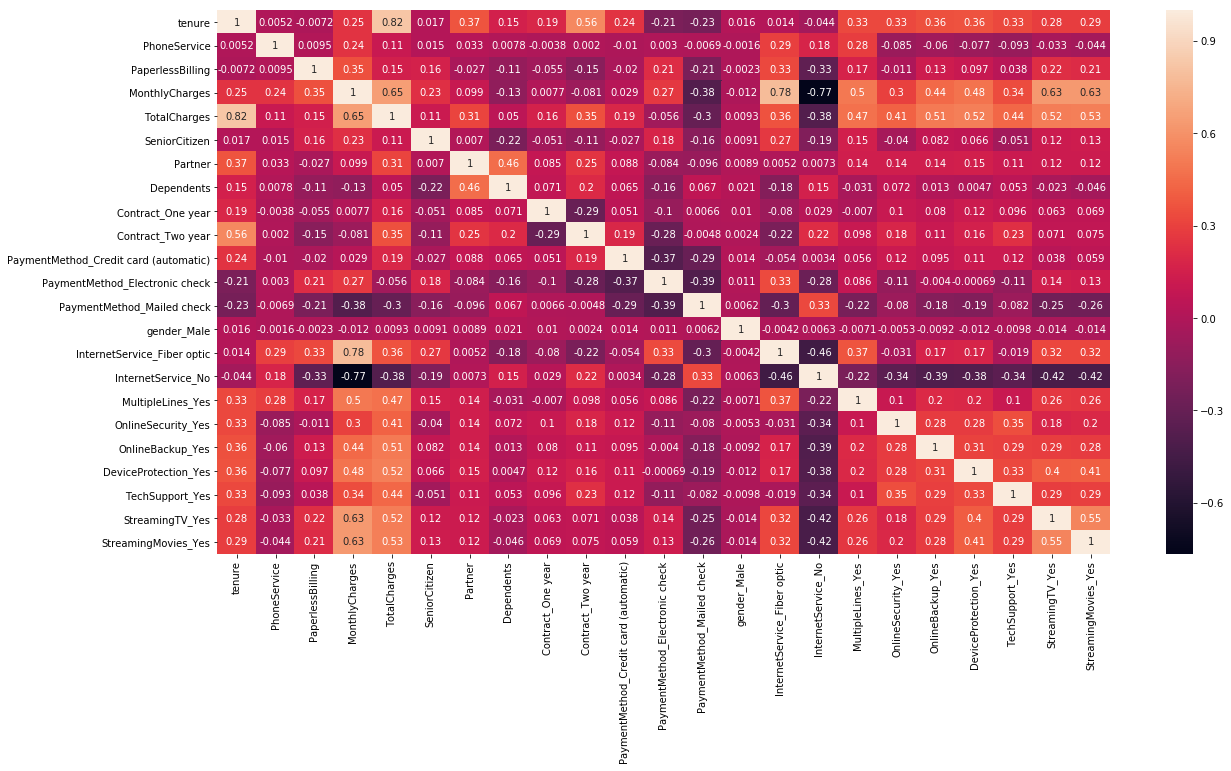

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(x_train.corr(),annot=True)
plt.show()

In [42]:
import statsmodels.api as sm

In [43]:
x_train_sm= sm.add_constant(x_train)
x_train_sm.head()


,const,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,...,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
1307,1.0,0.129501,1,1,0.365125,0.168006,0,0,0,1,...,0,0,0,0,1,1,1,1,0,1
5813,1.0,0.619217,1,0,1.567066,1.392457,0,1,1,0,...,1,1,0,1,1,1,1,1,1,1
1525,1.0,-1.053978,1,0,-1.455193,-0.949086,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1993,1.0,-1.298836,1,1,-0.624611,-0.999265,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1554,1.0,-0.278595,1,0,-1.446904,-0.789866,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [44]:
logm1 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1989.9
Date:                Mon, 10 Aug 2020   Deviance:                       3979.9
Time:                        08:36:15   Pearson chi2:                 5.58e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.1408      1.527     -2.056      0.040      -6.134      -0.147
tenure                                   -1.5655      0.189     -8.277      0.000      -1.936      -1.195
PhoneService                              0.3466      0.782      0.443      0.658      -1.187       1.880
PaperlessBilling                          0.2741      0.091      3.023      0.003       0.096       0.452
MonthlyCharges                           -1.4795      1.156     -1.280      0.201      -3.745       0.786
TotalCharges                              0.7962      0.198      4.030      0.000       0.409       1.183
SeniorCitizen                             0.3035      0.101      3.004      0.003       0.105       0.501
Partner                                   0.0286      0.095      0.303      0.762      -0.157       0.214
Dependents                               -0.1193      0.110     -1.086      0.277      -0.334       0.096
Contract_One year                        -0.7184      0.130     -5.537      0.000      -0.973      -0.464
Contract_Two year                        -1.5317      0.222     -6.908      0.000      -1.966      -1.097
PaymentMethod_Credit card (automatic)     0.0217      0.139      0.156      0.876      -0.251       0.294
PaymentMethod_Electronic check            0.4507      0.114      3.943      0.000       0.227       0.675
PaymentMethod_Mailed check               -0.0392      0.140     -0.279      0.780      -0.314       0.236
gender_Male                              -0.0154      0.079     -0.196      0.845      -0.169       0.139
InternetService_Fiber optic               1.9846      0.964      2.059      0.040       0.095       3.874
InternetService_No                       -1.9339      0.975     -1.983      0.047      -3.845      -0.022
MultipleLines_Yes                         0.4616      0.213      2.169      0.030       0.044       0.879
OnlineSecurity_Yes                       -0.0980      0.216     -0.453      0.650      -0.522       0.326
OnlineBackup_Yes                          0.0983      0.213      0.462      0.644      -0.319       0.516
DeviceProtection_Yes                      0.2557      0.212      1.204      0.228      -0.160       0.672
TechSupport_Yes                          -0.1380      0.217     -0.636      0.524      -0.563       0.287
StreamingTV_Yes                           0.6329      0.394      1.608      0.108      -0.139       1.405
StreamingMovies_Yes                       0.6865      0.396      1.733      0.083      -0.090       1.463
=========================================================================================================
"""

In [45]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()


In [46]:
from sklearn.feature_selection import RFE
rfe= RFE(logreg, 15)
rfe.fit(x_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=15, step=1, verbose=0)

In [47]:
rfe.support_ #gives best 15 features for the model true: feature lies in best 15, false: feature doesnt lie 

array([ True,  True,  True,  True,  True,  True, False, False,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
        True, False,  True, False, False])

In [48]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 6),
 ('Dependents', False, 2),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 9),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 5),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', True, 1),
 ('DeviceProtection_Yes', False, 7),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', False, 4),
 ('StreamingMovies_Yes', False, 3)]

In [49]:
col= x_train.columns[rfe.support_] #selecting the best 15 features


In [50]:
x_train.columns[~rfe.support_]

Index([u'Partner', u'Dependents', u'PaymentMethod_Credit card (automatic)',
       u'PaymentMethod_Mailed check', u'gender_Male', u'DeviceProtection_Yes',
       u'StreamingTV_Yes', u'StreamingMovies_Yes'],
      dtype='object')

### assesing the model with statsmodel inorder to get a statistic view of the model

In [51]:
x_train_sm= sm.add_constant(x_train[col])
logm2= sm.GLM(y_train,x_train_sm, family= sm.families.Binomial())
res= logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1992.3
Date:                Mon, 10 Aug 2020   Deviance:                       3984.7
Time:                        08:36:19   Pearson chi2:                 5.62e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.6691      0.228     -2.937      0.003      -1.116      -0.223
tenure                            -1.5573      0.186     -8.378      0.000      -1.922      -1.193
PhoneService                      -0.9323      0.180     -5.178      0.000      -1.285      -0.579
PaperlessBilling                   0.2856      0.090      3.165      0.002       0.109       0.462
MonthlyCharges                     0.4333      0.165      2.627      0.009       0.110       0.757
TotalCharges                       0.7938      0.196      4.050      0.000       0.410       1.178
SeniorCitizen                      0.3260      0.099      3.288      0.001       0.132       0.520
Contract_One year                 -0.7322      0.129     -5.669      0.000      -0.985      -0.479
Contract_Two year                 -1.5492      0.221     -7.004      0.000      -1.983      -1.116
PaymentMethod_Electronic check     0.4625      0.083      5.576      0.000       0.300       0.625
InternetService_Fiber optic        0.4158      0.182      2.288      0.022       0.060       0.772
InternetService_No                -0.3552      0.228     -1.556      0.120      -0.803       0.092
MultipleLines_Yes                  0.1515      0.101      1.504      0.133      -0.046       0.349
OnlineSecurity_Yes                -0.4147      0.104     -3.982      0.000      -0.619      -0.211
OnlineBackup_Yes                  -0.2230      0.095     -2.337      0.019      -0.410      -0.036
TechSupport_Yes                   -0.4544      0.109     -4.179      0.000      -0.668      -0.241
==================================================================================================
"""

In [52]:
y_train_predict= res.predict(x_train_sm)
y_train_predict.head()

1307    0.045207
5813    0.054412
1525    0.154559
1993    0.526340
1554    0.058591
dtype: float64

In [53]:
#y_train_predict= y_train_predict.values.reshape(-1)
y_train_predict[:10]

1307    0.045207
5813    0.054412
1525    0.154559
1993    0.526340
1554    0.058591
484     0.650299
6760    0.401813
6976    0.010436
3414    0.011395
3841    0.616283
dtype: float64

### Creating a datafram with actual churn flag and predicited probabilities

In [54]:
y_train_pred_f= pd.DataFrame({'Churn': y_train.values, 'Churn_prob': y_train_predict})
y_train_pred_f['custID']= y_train.index
y_train_pred_f.head()

,Churn,Churn_prob,custID
1307,0,0.045207,1307
5813,0,0.054412,5813
1525,0,0.154559,1525
1993,1,0.526340,1993
1554,0,0.058591,1554


creating a column predicted, here if churn probability is greater than 0.5 predicted would be 1 i.e true else false

In [55]:
y_train_pred_f['Predicted']= y_train_pred_f.Churn_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_f.head(10)

,Churn,Churn_prob,custID,Predicted
1307,0,0.045207,1307,0
5813,0,0.054412,5813,0
1525,0,0.154559,1525,0
1993,1,0.526340,1993,1
1554,0,0.058591,1554,0
484,1,0.650299,484,1
6760,1,0.401813,6760,0
6976,0,0.010436,6976,0
3414,0,0.011395,3414,0
3841,1,0.616283,3841,1


Making a confusion matrix to calculate the accuracy of the model

In [56]:
from sklearn import metrics

In [57]:
confusion= metrics.confusion_matrix(y_train_pred_f.Churn, y_train_pred_f.Predicted)
print(confusion)

[[3274  363]
 [ 553  732]]


In [58]:
print(metrics.accuracy_score(y_train_pred_f.Churn, y_train_pred_f.Predicted))

0.8138967899227956


In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
vif= pd.DataFrame()
vif['Features']= x_train[col].columns
vif['VIF']= [variance_inflation_factor(x_train[col].values,i) for i in range(x_train[col].shape[1])]
#vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by='VIF', ascending= False)
vif

,Features,VIF
3,MonthlyCharges,11.508498
4,TotalCharges,10.411618
1,PhoneService,8.885010
0,tenure,6.876170
9,InternetService_Fiber optic,6.379539
10,InternetService_No,6.214759
7,Contract_Two year,3.175194
2,PaperlessBilling,2.734829
11,MultipleLines_Yes,2.619625
13,OnlineBackup_Yes,2.052643


In [61]:
col= col.drop('TotalCharges',1)
col

Index([u'tenure', u'PhoneService', u'PaperlessBilling', u'MonthlyCharges',
       u'SeniorCitizen', u'Contract_One year', u'Contract_Two year',
       u'PaymentMethod_Electronic check', u'InternetService_Fiber optic',
       u'InternetService_No', u'MultipleLines_Yes', u'OnlineSecurity_Yes',
       u'OnlineBackup_Yes', u'TechSupport_Yes'],
      dtype='object')

In [62]:
x_train_sm= sm.add_constant(x_train[col])
logm3= sm.GLM(y_train,x_train_sm, family= sm.families.Binomial())
res= logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2001.0
Date:                Mon, 10 Aug 2020   Deviance:                       4001.9
Time:                        08:36:21   Pearson chi2:                 4.91e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.5722      0.223     -2.563      0.010      -1.010      -0.135
tenure                            -0.8737      0.068    -12.919      0.000      -1.006      -0.741
PhoneService                      -0.9557      0.177     -5.414      0.000      -1.302      -0.610
PaperlessBilling                   0.2758      0.090      3.066      0.002       0.099       0.452
MonthlyCharges                     0.6979      0.152      4.594      0.000       0.400       0.996
SeniorCitizen                      0.3305      0.100      3.317      0.001       0.135       0.526
Contract_One year                 -0.7352      0.128     -5.743      0.000      -0.986      -0.484
Contract_Two year                 -1.5195      0.219     -6.951      0.000      -1.948      -1.091
PaymentMethod_Electronic check     0.4611      0.083      5.547      0.000       0.298       0.624
InternetService_Fiber optic        0.3652      0.180      2.030      0.042       0.013       0.718
InternetService_No                -0.1444      0.222     -0.651      0.515      -0.580       0.291
MultipleLines_Yes                  0.1652      0.100      1.647      0.100      -0.031       0.362
OnlineSecurity_Yes                -0.4136      0.104     -3.966      0.000      -0.618      -0.209
OnlineBackup_Yes                  -0.2038      0.095     -2.137      0.033      -0.391      -0.017
TechSupport_Yes                   -0.4416      0.109     -4.058      0.000      -0.655      -0.228
==================================================================================================
"""

In [63]:
y_train_predict= res.predict(x_train_sm).values.reshape(-1)

In [64]:
y_train_pred_f['Churn_Prob']= y_train

In [65]:
y_train_pred_f['Predicted']= y_train_pred_f.Churn_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_f.head(10)

,Churn,Churn_prob,custID,Predicted,Churn_Prob
1307,0,0.045207,1307,0,0
5813,0,0.054412,5813,0,0
1525,0,0.154559,1525,0,0
1993,1,0.526340,1993,1,1
1554,0,0.058591,1554,0,0
484,1,0.650299,484,1,1
6760,1,0.401813,6760,0,1
6976,0,0.010436,6976,0,0
3414,0,0.011395,3414,0,0
3841,1,0.616283,3841,1,1


In [66]:
print(metrics.accuracy_score(y_train_pred_f.Churn, y_train_pred_f.Predicted))

0.8138967899227956


In [67]:
#accuracy hadnt dropped much
#now calculating the VIFs again 
vif= pd.DataFrame()
vif['Features']= x_train[col].columns
vif['VIF']= [variance_inflation_factor(x_train[col].values,i) for i in range(x_train[col].shape[1])]
#vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by='VIF', ascending= False)
vif

,Features,VIF
1,PhoneService,8.795302
3,MonthlyCharges,7.863682
8,InternetService_Fiber optic,6.329753
9,InternetService_No,5.997183
6,Contract_Two year,3.162574
2,PaperlessBilling,2.734805
10,MultipleLines_Yes,2.618524
0,tenure,2.487824
12,OnlineBackup_Yes,2.012608
13,TechSupport_Yes,2.003621


In [68]:
#dropping Phone service
col= col.drop('PhoneService')
col

Index([u'tenure', u'PaperlessBilling', u'MonthlyCharges', u'SeniorCitizen',
       u'Contract_One year', u'Contract_Two year',
       u'PaymentMethod_Electronic check', u'InternetService_Fiber optic',
       u'InternetService_No', u'MultipleLines_Yes', u'OnlineSecurity_Yes',
       u'OnlineBackup_Yes', u'TechSupport_Yes'],
      dtype='object')

In [69]:
x_train_sm= sm.add_constant(x_train[col])
logm4= sm.GLM(y_train,x_train_sm, family= sm.families.Binomial())
res= logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2015.5
Date:                Mon, 10 Aug 2020   Deviance:                       4031.1
Time:                        08:36:22   Pearson chi2:                 4.83e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.4458      0.156     -9.254      0.000      -1.752      -1.140
tenure                            -0.8013      0.066    -12.165      0.000      -0.930      -0.672
PaperlessBilling                   0.3032      0.089      3.394      0.001       0.128       0.478
MonthlyCharges                     0.2915      0.131      2.218      0.027       0.034       0.549
SeniorCitizen                      0.3562      0.099      3.588      0.000       0.162       0.551
Contract_One year                 -0.7015      0.128     -5.500      0.000      -0.951      -0.451
Contract_Two year                 -1.4859      0.219     -6.796      0.000      -1.914      -1.057
PaymentMethod_Electronic check     0.4959      0.083      6.010      0.000       0.334       0.658
InternetService_Fiber optic        0.5318      0.176      3.019      0.003       0.187       0.877
InternetService_No                -0.7814      0.187     -4.184      0.000      -1.147      -0.415
MultipleLines_Yes                  0.1608      0.099      1.618      0.106      -0.034       0.356
OnlineSecurity_Yes                -0.3879      0.104     -3.743      0.000      -0.591      -0.185
OnlineBackup_Yes                  -0.1258      0.094     -1.340      0.180      -0.310       0.058
TechSupport_Yes                   -0.3658      0.107     -3.410      0.001      -0.576      -0.156
==================================================================================================
"""

In [70]:
y_train_predict= res.predict(x_train_sm).values.reshape(-1)
y_train_pred_f['Churn_Prob']= y_train
y_train_pred_f['Predicted']= y_train_pred_f.Churn_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_f.head(10)

,Churn,Churn_prob,custID,Predicted,Churn_Prob
1307,0,0.045207,1307,0,0
5813,0,0.054412,5813,0,0
1525,0,0.154559,1525,0,0
1993,1,0.526340,1993,1,1
1554,0,0.058591,1554,0,0
484,1,0.650299,484,1,1
6760,1,0.401813,6760,0,1
6976,0,0.010436,6976,0,0
3414,0,0.011395,3414,0,0
3841,1,0.616283,3841,1,1


In [71]:
print(metrics.accuracy_score(y_train_pred_f.Churn, y_train_pred_f.Predicted))

0.8138967899227956


In [72]:
#The accuracy has not dropped 
#now calculating the VIFs again 
vif= pd.DataFrame()
vif['Features']= x_train[col].columns
vif['VIF']= [variance_inflation_factor(x_train[col].values,i) for i in range(x_train[col].shape[1])]
#vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by='VIF', ascending= False)
vif

,Features,VIF
2,MonthlyCharges,7.863680
7,InternetService_Fiber optic,5.546154
8,InternetService_No,4.905998
5,Contract_Two year,2.992593
1,PaperlessBilling,2.596764
9,MultipleLines_Yes,2.387552
0,tenure,2.182851
11,OnlineBackup_Yes,1.951042
12,TechSupport_Yes,1.926712
6,PaymentMethod_Electronic check,1.798383


All the variables have a good VIf now we need not drop anymore variables.

In [73]:
confusion= metrics.confusion_matrix(y_train_pred_f.Churn, y_train_pred_f.Predicted)
print(confusion)

[[3274  363]
 [ 553  732]]


In [74]:
metrics.accuracy_score(y_train_pred_f.Churn, y_train_pred_f.Predicted)

0.8138967899227956

In [75]:
#For calculation of sensitivity and specificity

TP= confusion[1,1] #True positives
TN=confusion[0,0] #True negatives 
FN= confusion[1,0] #False negative
FP= confusion[0,1] #False positive


In [76]:
 TP/ float(TP+FN) #sensitivity

0.5696498054474708

In [77]:
TN/ float(TN+FP) #specificity

0.9001924663183943

## Plotting the ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [78]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [80]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_f.Churn, y_train_pred_f.Churn_Prob, drop_intermediate = False )

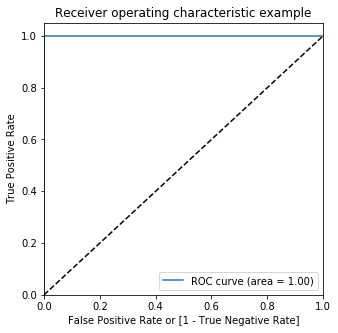

In [82]:
draw_roc(y_train_pred_f.Churn, y_train_pred_f.Churn_Prob)